### Importing Necessary Libraries

In [1]:
import numpy as np
import math
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

### Function to calculate Sample Standard Deviation

In [2]:
def sample_std(sample):
    numerator = []
    for i in sample:
        numerator.append((i-sum(sample)/len(sample))**2)
    sample_variance = sum(numerator)/(len(sample)-1)
    sample_std = math.sqrt(sample_variance)
    print('sample_std :     {0:.1f}'.format(sample_std))

### Function to calculate t-Score

In [3]:
def t_score(sample_mean,population_mean,sample_std,sample_size):
    numerator = (sample_mean - population_mean)
    denominator = (sample_std/math.sqrt(sample_size))
    tscore = numerator/denominator
    return tscore
    

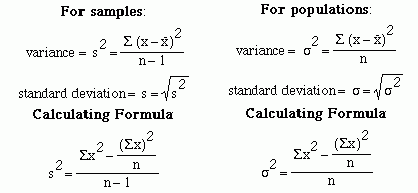

## Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

### Step-1: Collecting a sample

In [4]:
sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample_mean = sum(sample)/len(sample)

### Step-2: Defining Sample & Population parameters

In [5]:
sample_size = len(sample)
sample_mean = sample_mean
population_mean = 500

print('sample_size:    ',sample_size)
sample_std(sample)
print('sample_mean:    ',sample_mean)
print('population_mean:',population_mean)


sample_size:     10
sample_std :     86.8
sample_mean:     465.3
population_mean: 500


### Step-3: Calculating t-Score

In [6]:
# Since we don't have population standard deviation, we calculated sample standard deviation. That's why we calculated T-Score
t = t_score(465.3,500,86.8,10)
print(t)

-1.2641824286617827


### Step-4: Two tailed test

In [7]:
confidence_level = 0.95
alpha = 1 - confidence_level
dof = len(sample)-1
t_critical = st.t.ppf(1-alpha/2,dof)
print(t_critical)

2.2621571627409915


### Step-5: Calculating p-value

In [8]:
st.ttest_1samp(sample,population_mean)

Ttest_1sampResult(statistic=-1.263475128444671, pvalue=0.23816470585327693)

#### Otherway to find p-Value

In [9]:
p = 2*(1-st.t.cdf(np.abs(t),9))
print(p)

0.23792218530661824


### Conclusion using t-test

In [10]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### Step-6 Conclusion using p-value

In [11]:
if(p < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


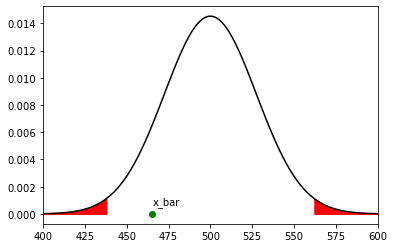

In [12]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = 86.8 / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y, color = 'black')

# Computing the left and right critical values (Two tailed Test)
t_critical_left = population_mean + (-t_critical * std)
t_critical_right = population_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = st.norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = st.norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0, color = 'green')
plt.annotate("x_bar", (sample_mean, 0.0007))
plt.show()

#### In this case the Sample mean doesn't falls in the rejection region. So, we Fail to Reject the Null Hypothesis

## Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of "1 to 5". How do you prove this to your client?

### Step-1: Collecting a sample

In [13]:
sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

### Step-2: Defining Sample & Population parameters

In [14]:
sample_size = len(sample)
sample_mean = sum(sample)/len(sample)
population_mean = 4
sample_std(sample)

print('sample_size:    ',sample_size)
print('sample_mean:    ',sample_mean)
print('population_mean:',population_mean)


sample_std :     0.9
sample_size:     20
sample_mean:     4.25
population_mean: 4


### Step-3: Calculating t-score

In [15]:
t = t_score(4.25,4,0.9,20)
print(t)

1.2422599874998832


### Step-4: One tailed test

In [16]:
confidence_level = 0.95
alpha = 1 - confidence_level
dof = len(sample)-1
t_critical = st.t.ppf(1-alpha,dof)
print(t_critical)

1.729132811521367


### Step-5 Calculating P-value

In [17]:
p = (1-st.t.cdf(np.abs(t),19))
print(p)

0.11462786961142124


In [18]:
p = (st.t.cdf(-abs(t),19))
print(p)

0.11462786961142117


### Conclusion using t-test

In [19]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### Step-6: Conclusion using p-value

In [20]:
if(p < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


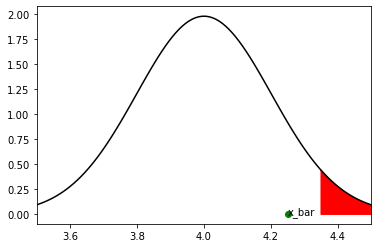

In [21]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = 0.9 / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y, color = 'black')

# Computing the lright critical values (Two tailed Test)
t_critical_right = population_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = st.norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0, color = 'green')
plt.annotate("x_bar", (sample_mean, 0.0007))
plt.show()

#### In this case the Sample mean doesn't falls in the rejection region. So, we Fail to Reject the Null Hypothesis

## Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

### Step-1: Collecting a sample

In [22]:
sample = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,
          15.46,13.88,14.31,14.41,15.76,15.38]

### Step-2: Defining Sample & Population parameters

In [23]:
sample_size = len(sample)
sample_mean = sum(sample)/len(sample)
population_mean = 15
sample_std(sample)

print('sample_size:    ',sample_size)
print('sample_mean:    ',sample_mean)
print('population_mean:',population_mean)

sample_std :     1.0
sample_size:     20
sample_mean:     15.098999999999998
population_mean: 15


### Step-3: Calculating t-score

In [24]:
t = t_score(15.09,15,1,20)
print(t)

0.40249223594996153


### Step-4 One tail test

In [25]:
confidence_level = 0.95
alpha = 1 - confidence_level
dof = len(sample)-1
t_critical = st.t.ppf(1-alpha,dof)
print(t_critical)

1.729132811521367


### Step-5 Calculating P-value

In [26]:
p = (1-st.t.cdf(np.abs(t),19))
print(p)

0.3459070786989713


### Conclusion using t-test

In [27]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


### Step-6: Conclusion using p-value

In [28]:
if(p < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


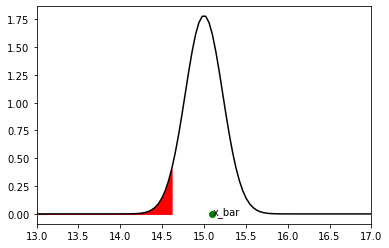

In [29]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = 1 / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y, color = 'black')

# Computing the left and right critical values (Two tailed Test)
t_critical_left = population_mean + (-t_critical * std)
t_critical_right = population_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = st.norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0, color = 'green')
plt.annotate("x_bar", (sample_mean, 0.0007))
plt.show()

#### In this case the Sample mean doesn't falls in the rejection region. So, we Fail to Reject the Null Hypothesis

## Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

### Step-1: Collecting a sample

In [30]:
sample = [90,85,99,88,76,69,95,106,104,101,88,94,100,101,118,110,67,79,84,95,93,87,106,46,108]

### Step-2: Defining Sample & Population parameters

In [31]:
sample_size = len(sample)
sample_mean = sum(sample)/len(sample)
population_mean = 100
sample_std(sample)

print('sample_size:    ',sample_size)
print('sample_mean:    ',sample_mean)
print('population_mean:',population_mean)

sample_std :     15.8
sample_size:     25
sample_mean:     91.56
population_mean: 100


### Step-3: Calculating t-score

In [32]:
t = t_score(91.56,100,15.8,25)
print(t)

-2.6708860759493662


### Step-4 One-tailed test

In [33]:
confidence_level = 0.95
alpha = 1 - confidence_level
dof = len(sample)-1
t_critical = st.t.ppf(1-alpha,dof)
print(t_critical)

1.7108820799094275


### Step-5 Calculating p-value

In [34]:
p = (1-st.t.cdf(np.abs(t),19))
print(p)

0.007553794947989134


### Conclusion using t-test

In [35]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


### Step-6 Conclusion using p-value

In [36]:
if(p < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


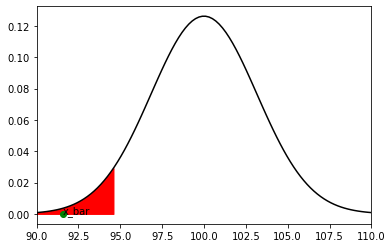

In [37]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 90
x_max = 110


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = 15.8 / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = st.norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y, color = 'black')

# Computing the left and right critical values (Two tailed Test)
t_critical_left = population_mean + (-t_critical * std)
t_critical_right = population_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = st.norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0, color = 'green')
plt.annotate("x_bar", (sample_mean, 0.0007))
plt.show()

#### In this case the Sample mean falls in the rejection region. So, we Reject the Null Hypothesis